First, we import all required libraries:

In [1]:
import matplotlib.pyplot as plt
from IPython import get_ipython

get_ipython().run_line_magic('matplotlib', 'inline')

import numpy as np
from skimage.io import imread
from skimage.transform import resize

Load a color image in greyscale, by specifying a path.  On executing the code, an image is generated as a result.

('This image is: ', <type 'numpy.ndarray'>, 'with dimensions:', (28, 28))


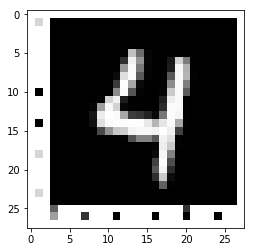

In [2]:
image = imread('sample_digit.png', as_grey=True)
image = resize(image, (28, 28), mode='reflect')
print('This image is: ', type(image),
      'with dimensions:', image.shape)
plt.imshow(image, cmap='gray')

Further, we execute another block of code, and generate yet another image.  Pixels are now made of images, with individual values:

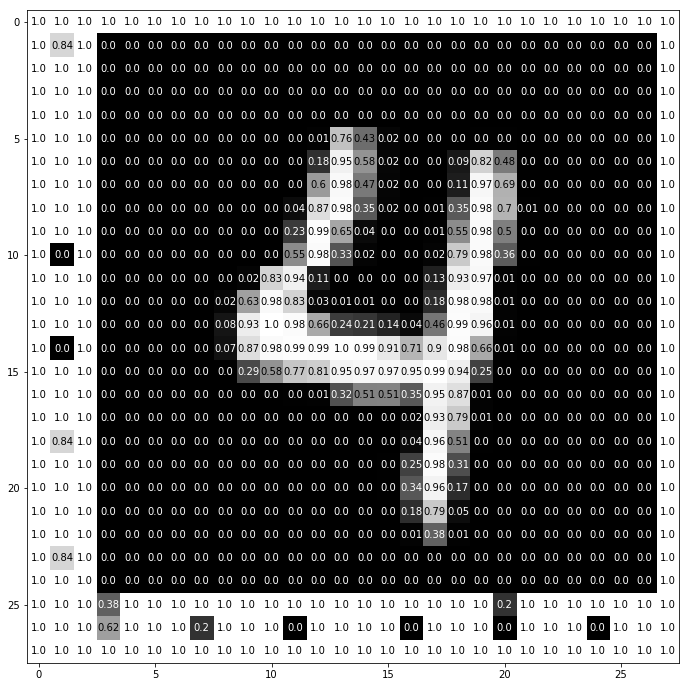

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[ x ][ y ], 2)), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[ x ][ y ] < thresh else 'black')


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
visualize_input(image, ax)

To create a convolutional layer in Keras, first we import the required modules with the code below:

In [4]:
from keras.layers import Conv2D

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Then, we'll create the convolutional layer.
The arguments in detail:
    filter specifies the number of filters
    kernel specifies the height and width of the convolutional video
    ...there are also some additional (optional) arguments that you might want to tune:
        stride of convolution (if not specified, default is one)
        activation is typically 'relu'.  If not specified, no activation is applied.
        Finally, input shape is provided by a TUPLE, specifies the height, width and depth, in that order.
        

In [5]:
Conv2D (filters=16, kernel_size=2, strides=2, activation='relu', input_shape=(200, 2001))

After we build our CNN model, we can have the next layer be the Convolutional layer:
    this layer will have 32 filters, with width and height set to 3
    this takes the previous output as input for the next layer
    we set the convolution to jump one filter at a time, so that each layer is able to see...
    ...the previous layer as well

In [6]:
Conv2D (filters=32, kernel_size=3, padding='same', activation='relu')

Finally, we arrive at our final example.  Here we have 64 filters, size 2x2 and 'relu' activation

In [7]:
Conv2D (64, (2,2), activation='relu')